# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

The goal is to identify key drivers for used car prices.  

In the CRISP-DM overview, we are asked to convert this business problem into a data problem definition

The primary goal is to understand the factors that contribute to value a car's price. 

By using a dataset containing details of about 426,000 cars, performed an in-depth examination and modeling to visualize and inference the elements that make a car more or less expensive. 

This will help our client, a used car dealership, to better understand consumer preferences in a used car and optimize their inventory derive from this analysis.

In the used car business, pricing is key factor. 

Our client, a used car dealership, wants to understand the factors that make a car more or less expensive in order to optimize their purchasing and pricing strategies. 

By understanding what consumers value in a used car, the dealership can make more informed decisions regarding the vehicles they buy and sell, and how they price them. 

This could potentially increase their profitability and customer satisfaction.

### Data Definition Problem

The objective is to predict the price of used cars (the dependent variable) based on various features like region, year, manufacturer, model, condition, cylinders, fuel type, odometer reading, title status, transmission type, VIN, drive, size, car type, paint color, and state (the independent variables).

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  

Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The dataset is an extract of 426,880 used cars from Craigslist (from a 3 million record source). 
Each row represents a car, and each column represents an attribute of the car. 

The dataset contains the following attributes:

* region        : Craigslist region where the car is being sold
* price         : advertised price of the car
* year          : model year of the car
* manufacturer  : manufacturer name
* model         : model name
* condition     : condition of the car (excellent, good, like new, etc.)
* cylinders     : number of cylinders
* fuel          : fuel type (gas, diesel, etc.)
* odometer      : number of miles the car has been driven
* title_status  : title status (clean, missing, etc.)
* transmission  : transmission type (automatic, manual, etc.)
* VIN           : vehicle identification number
* drive         : drive type (fwd, rwd, etc.)
* size          : size of the car (compact, mid-size, etc.)
* type          : type of the car (SUV, sedan, etc.)
* paint_color   : color of the car
* state         : state where the car is being sold


In [188]:
## import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory Data Analysis and Visualization

In [189]:
# Load the dataset
df = pd.read_csv('data/vehicles.csv')

#set index to id
df.set_index('id', inplace=True)

# preview the dataset
display(df.head())
display(df.tail())
display(df.info())
display(df.describe())

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)

None

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [190]:
# display number of missing values by column
df.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Distribution analysis of numerical features


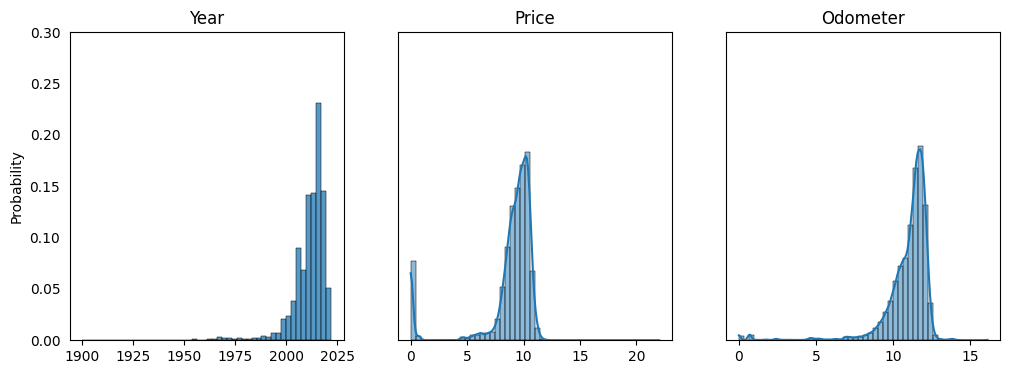

In [191]:
# Create a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the histograms in separate subplots
sns.histplot(df['year'],     bins=50,  ax=axs[0], stat='probability')
sns.histplot(np.log1p(df['price']), bins=50, kde=True, ax=axs[1], stat='probability')
sns.histplot(np.log1p(df['odometer']), bins=50, kde=True, ax=axs[2], stat='probability')

for i in np.arange(3):
    if i%3 == 0 :
        axs[i].set_ylabel('Probability')
    else:
        axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].tick_params(left=False, labelleft=(i % 3 == 0))
    axs[i].set_ylim(0, .3)
# Set the titles for each subplot
axs[0].set_title('Year')
axs[1].set_title('Price')
axs[2].set_title('Odometer')

# Display the plot
plt.show()

##### Observations detected on visual data

1. Few cars are made before 1996 
2. Car olders than 25 years are considered as collectible cars witch not consider during this analysis, I think dealership is mostly commercial not antique or clasic cars
3. Outliers in the price and odometer columns are present. We will remove them in the data preprocessing step.
4. We can see a drop in car from 2008 to 2010, this is due to the financial crisis of 2008, consider that should not impact our analysis as we are looking at the price of the car and not the number of car sold

In [192]:
# print value counts for each categorical feature
for i in df.select_dtypes(include='object').columns:
    # print unique count
    print(i, ':', len(df[i].unique()), 'labels')
    print(df[i].value_counts())

region : 404 labels
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64
manufacturer : 43 labels
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti     

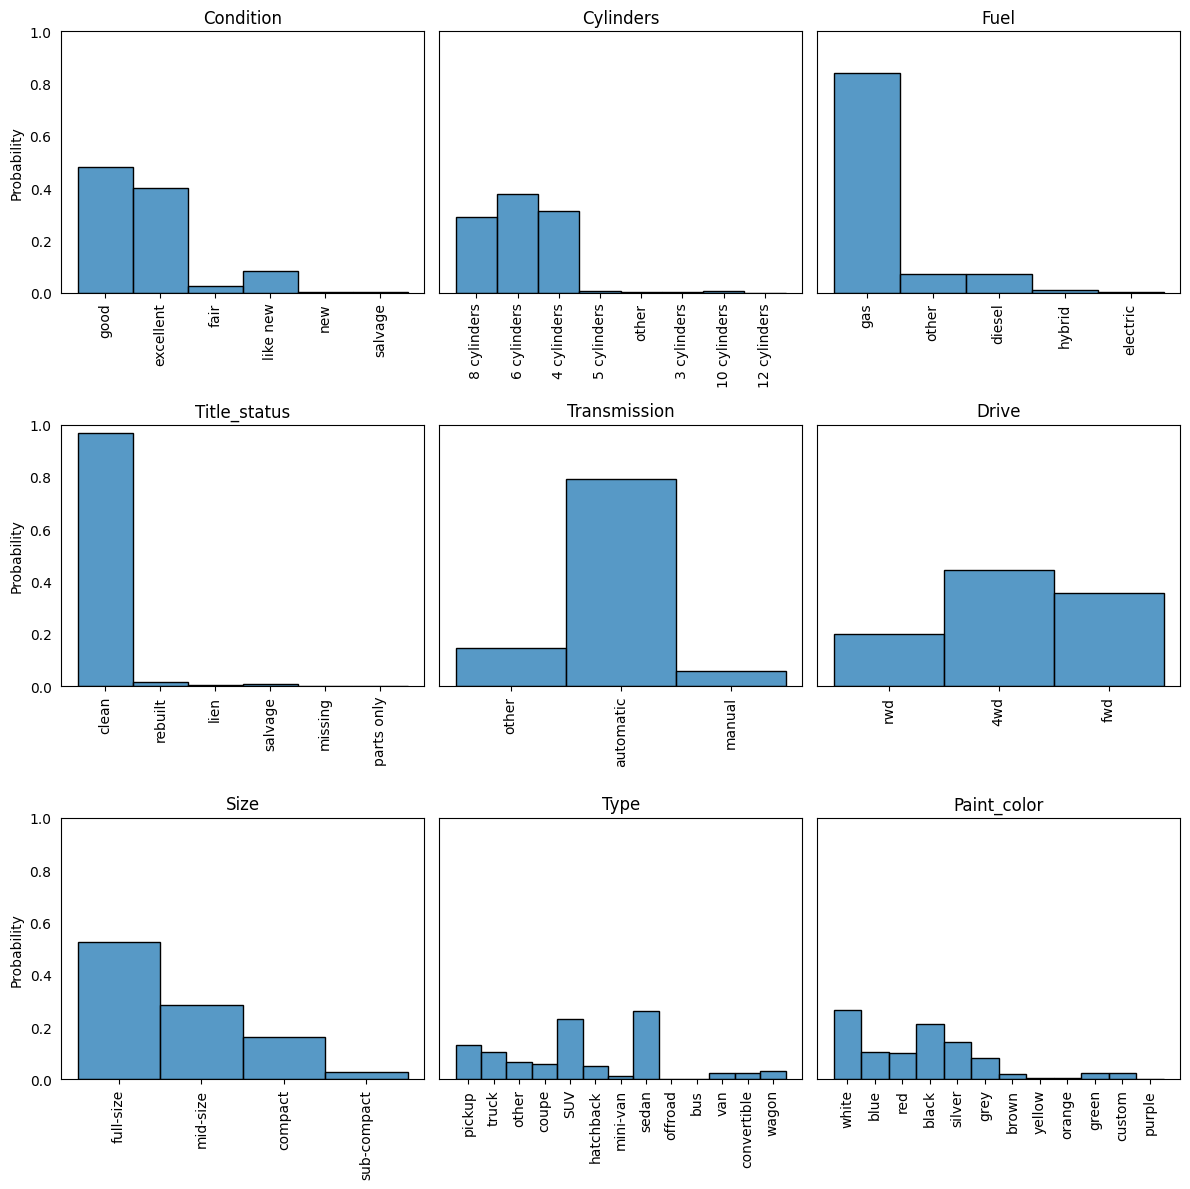

In [193]:
# create histograms for categorical features :
columns = ['condition', 'cylinders', 'fuel', 'title_status',
           'transmission', 'drive', 'size', 'type', 'paint_color']

# Create a grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the 2D array of subplots into a 1D array
axs = axs.flatten()

# Loop over the columns and plot a histogram in each subplot
for i, col in enumerate(columns):
    sns.histplot(df[col], ax=axs[i], kde=False, stat='probability')
    axs[i].set_title(col.capitalize())
    if i%3 == 0 :
        axs[i].set_ylabel('Probability')
    else:
        axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].tick_params(left=False, labelleft=(i % 3 == 0))
    axs[i].tick_params(axis='x', labelrotation=90)
    axs[i].set_ylim(0, 1)

# Remove the unused subplots
for i in range(len(columns), len(axs)):
    axs[i].remove()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


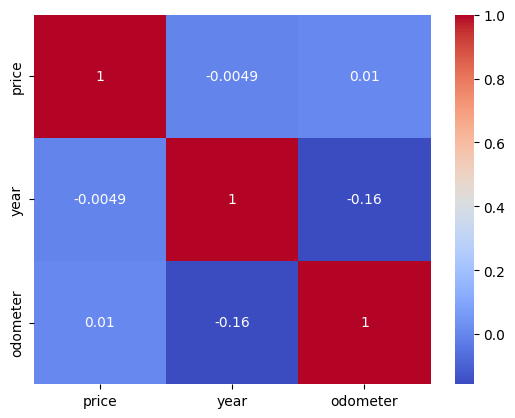

In [194]:
# get list of numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns

#draw correlation matrix of numerical features
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm')
plt.show()

##### Observations from Correlation Heat Map:
There is no correlation that is significant enough to be removed.

### Data Preparation

This initial exploration and fine tuning of the business understanding or inference about our features

 It is time to construct our final dataset prior to modeling.  
 
 Need to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, along others), and general preparation for modeling with python `sklearn` libraries. 

### Data Cleaning
Remove duplicates along the way that were found

In [195]:
print(df.shape)
# remove duplicated records
df.drop_duplicates(keep='first', inplace=True)
print(df.shape)

(426880, 17)
(370678, 17)


### Remove outliers in the price, year and odometer columns


In [196]:
# Car older 20 years are considered as classic cars. 
# They is limited number of classic car in the dataset. 
# I think depends on the dealership kind of business, we should consider remove them since assumption is dealership is more commercial
df = df[df['year'] > 2001]

# Car with price lower than 2000 are considered as outliers and are excluded from the dataset
df = df[df['price'] > 2000]

# Car with price higher than 100,000 are considered as outliers and are excluded from the dataset
df = df[df['price'] < 100000]

# Car with odometer higher than 300,000 are considered as outliers and are excluded from the dataset
df = df[df['odometer'] < 300000]

print(df.shape)

(296931, 17)


In [197]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy


In [198]:
# remove Vin, region, model, size and state columns
# we do not have a vin correlation to see if car is not stolen, but would be handy or assuming are not stolen cars.
# depends on the dealership locations, it might be important to see state, but for know will give general idea across all the states.
df.drop(['VIN', 'model', 'region', 'state'], axis=1, inplace=True)

In [199]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
id,,,,,,,,,,,,,
7316814884,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white
7316814758,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue
7316814989,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red
7316743432,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red
7316356412,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301591192,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN
7301591187,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red
7301591147,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white


In [200]:
# Identify null values ratio for each feature
nullrt = df.isnull().sum()/len(df)
# Drop records with null values in the features with null values ratio < 3%
for i in nullrt[nullrt < 0.03].index:
    df = df.dropna(subset=[i])
print(df.shape)

(281781, 13)


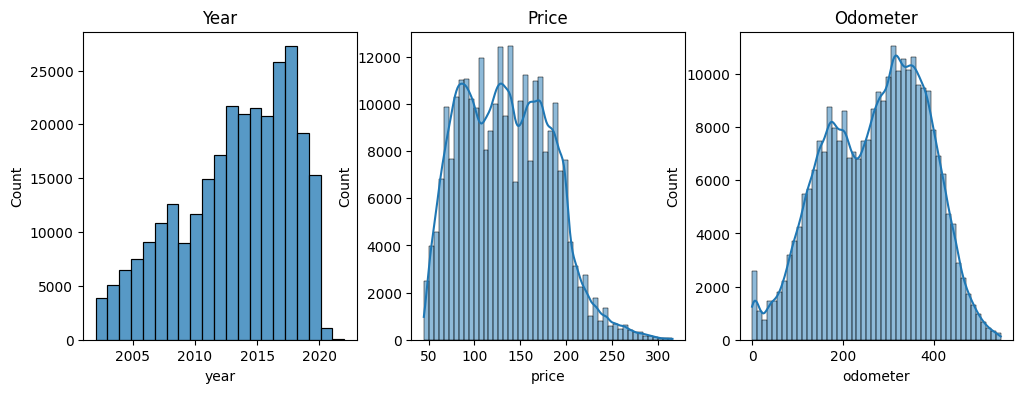

In [201]:
# Create a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the histograms in separate subplots
sns.histplot(df['year'],     bins=21, ax=axs[0])
sns.histplot(np.sqrt(df['price']),    bins=50, kde=True, ax=axs[1])
sns.histplot(np.sqrt(df['odometer']), bins=50, kde=True, ax=axs[2])

# Set the titles for each subplot
axs[0].set_title('Year')
axs[1].set_title('Price')
axs[2].set_title('Odometer')

# Display the plot
plt.show()

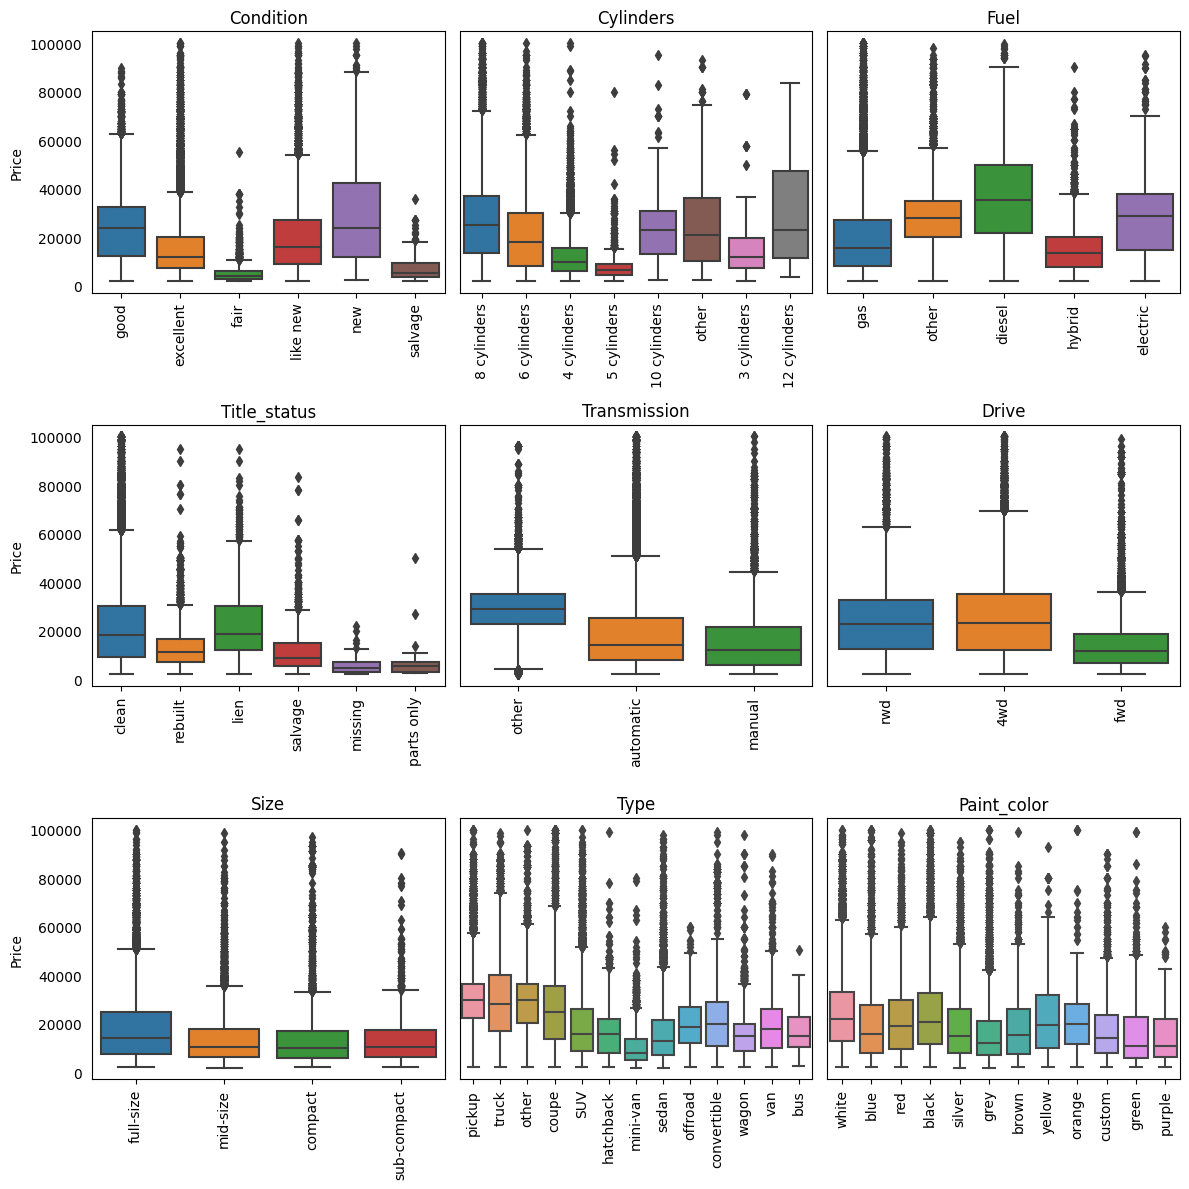

In [202]:
# create box plots for categorical features :
columns = ['condition', 'cylinders', 'fuel', 'title_status',
           'transmission', 'drive', 'size', 'type', 'paint_color']

# Create a grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the 2D array of subplots into a 1D array
axs = axs.flatten()

# Loop over the columns and plot a box plot in each subplot
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], y=df['price'], ax=axs[i])
    axs[i].set_title(col.capitalize())
    if i%3 == 0 :
        axs[i].set_ylabel('Price')
    else:
        axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].tick_params(left=False, labelleft=(i % 3 == 0))
    axs[i].tick_params(axis='x', labelrotation=90)

# Remove the unused subplots
for i in range(len(columns), len(axs)):
    axs[i].remove()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

#### Get an overview of the dataset after cleaning

<Axes: xlabel='odometer', ylabel='price'>

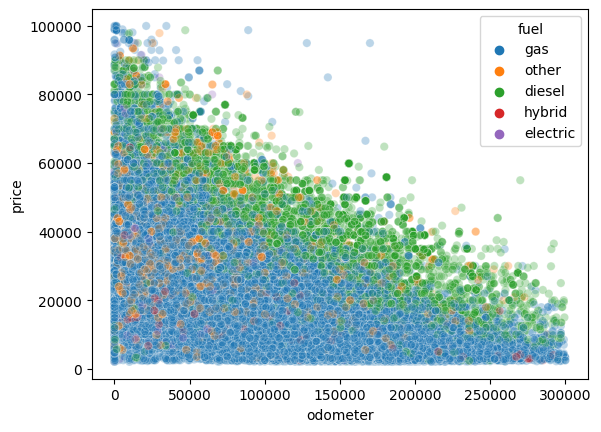

In [203]:
# Draw scatter plots price against odometer for each title status of a random 20% sample of the dataset
sns.scatterplot(x='odometer', y='price', hue='fuel', data=df.sample(frac=0.5), alpha=0.3)

#### Feature preprocessing

In [204]:
# map the values of the 'condition' column to a new column 'condition_mapped' defaulting to most common value
df['condition'] = df['condition'].map({'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}).fillna(3)

# map the values of the 'cylinders' column to a new column 'cylinders_mapped'
df['cylinders'] = df['cylinders'].map({'other': 0, '3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6, '8 cylinders': 8, '10 cylinders': 10, '12 cylinders': 12}).fillna(6)

# map the values of the 'size' column to a new column 'size_mapped'
df['size'] = df['size'].map({'sub-compact':0, 'compact': 1, 'mid-size': 2, 'full-size': 3}).fillna(3)

# replace year with age
df['age'] = 2022 - df['year']
df.drop('year', axis=1, inplace=True)


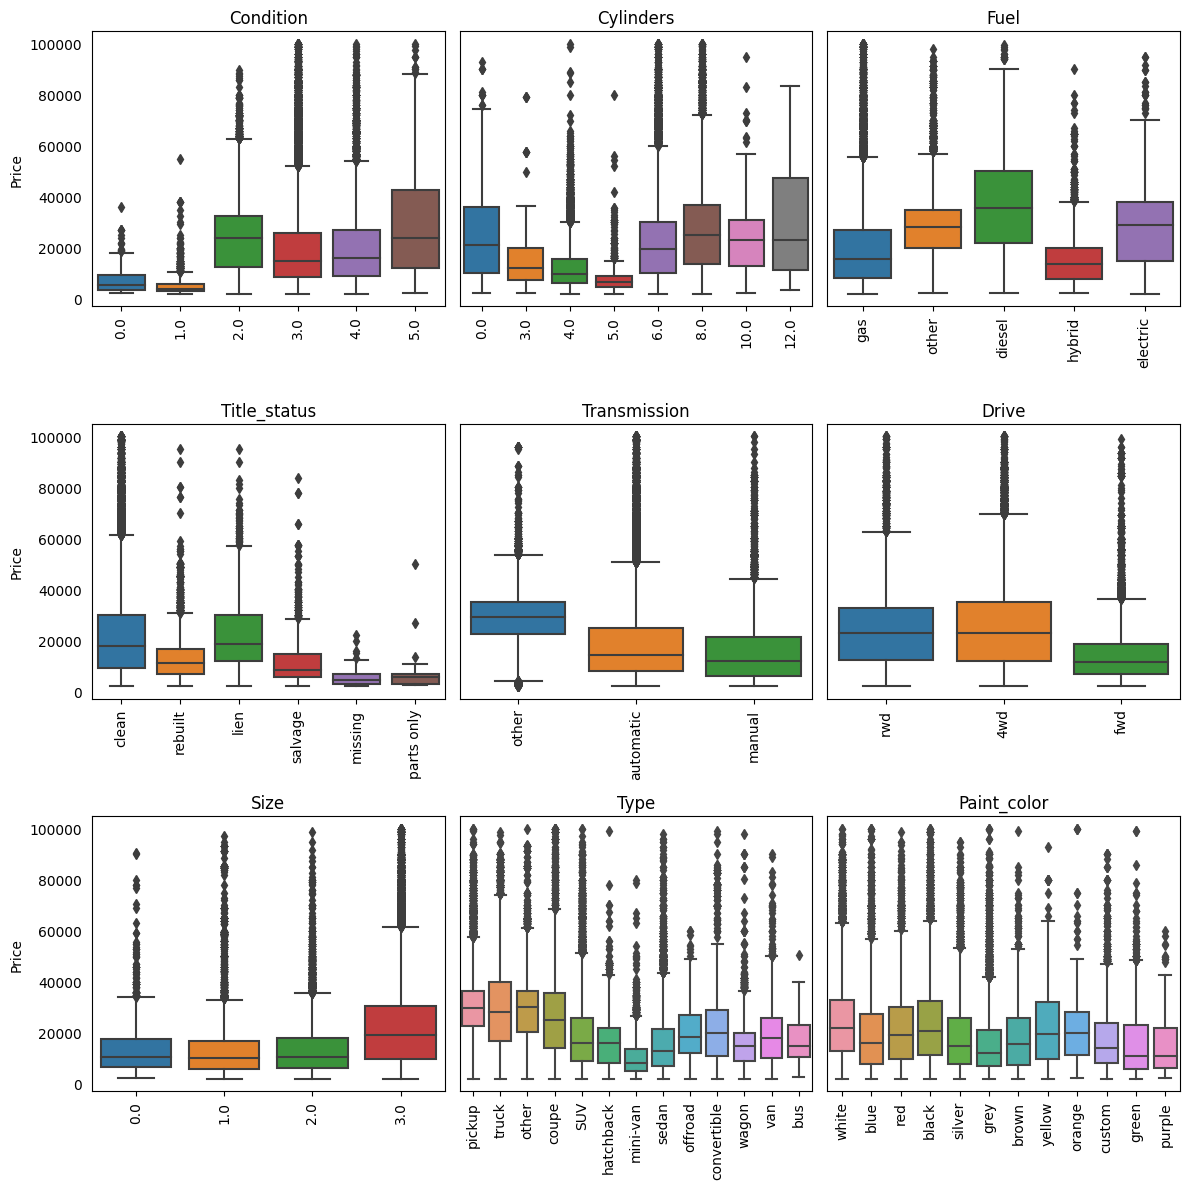

In [205]:
# create box plots for categorical features :
columns = ['condition', 'cylinders', 'fuel', 'title_status',
           'transmission', 'drive', 'size', 'type', 'paint_color']

# Create a grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the 2D array of subplots into a 1D array
axs = axs.flatten()

# Loop over the columns and plot a box plot in each subplot
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], y=df['price'], ax=axs[i])
    axs[i].set_title(col.capitalize())
    if i%3 == 0 :
        axs[i].set_ylabel('Price')
    else:
        axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].tick_params(left=False, labelleft=(i % 3 == 0))
    axs[i].tick_params(axis='x', labelrotation=90)

# Remove the unused subplots
for i in range(len(columns), len(axs)):
    axs[i].remove()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

Any further preprocessing will be integrated into the pipeline of the model.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

I will be using multiple regression model such as Linear Regression, Ridge Regression, Lasso Regression.

I'll also use a voting regressor to combine the predictions of the above models.

In [206]:
# import required libraries
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel

# disable warnings
import warnings
warnings.filterwarnings('ignore')

#### Create preprocessing pipeline:

1. Scale numerical features
2. One-hot encode categorical features
3. Polynomial features

In [207]:
# create a list of numeric features
numeric_features = ['age', 'odometer', 'condition', 'cylinders', 'size']

# create a list of categorical features
categorical_features = ['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

# add polynomial features and standard scaler to 'num' transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('poly', PolynomialFeatures()),
                                ('scaler', StandardScaler())]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), categorical_features)],
        remainder='drop')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Creating a baseline model based on mean value of the target

In [208]:
# split the dataset into feature matrix X and target vector y
X = df.drop(['price'], axis=1)
y = df['price']

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=534)

In [209]:
baseline_train = np.ones(y_train.shape)*y_train.mean()
baseline_test = np.ones(y_test.shape)*y_test.mean()

print('MSE train:', mean_squared_error(baseline_train, y_train))
print('MSE test :', mean_squared_error(baseline_test, y_test))
print('R2  train:', r2_score(baseline_train, y_train))
print('R2  test :', r2_score(baseline_test, y_test))
print('MAE train:', mean_absolute_error(baseline_train, y_train))
print('MAE test :', mean_absolute_error(baseline_test, y_test))

MSE train: 198930975.09723014
MSE test : 197902832.74031672
R2  train: -3.7576998768149426e+30
R2  test : 0.0
MAE train: 11308.67824859613
MAE test : 11282.203101685933


In [210]:
# Create function to evaluate models using cross-validation and grid search
# models: dictionary of models to evaluate
# preprocessor: preprocessor object
# X_train, y_train, X_test, y_test: train and test data
# scoring: scoring metric
def evalRegressorModels(models,preprocessor,X_train,y_train,X_test,y_test, scoring='neg_mean_squared_error'):

    # create dataframe to capture model metrics
    metrics = []

    # loop through the regressors dictionary items
    for model_name, (model, params) in models.items():
        # Create grid search
        print(f'Running grid search for {model_name}')
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        # create a grid search object and fit it to the data using cross-validation
        grid = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1, scoring=scoring)

        # fit the grid search object to the training data
        grid.fit(X_train, y_train)

        results = grid.cv_results_
        # capture the best estimator and the best parameters
        best_model = grid.best_estimator_
        best_params = grid.best_params_

        # predict on the test data using the best estimator
        train_pred = best_model.predict(X_train)
        test_pred = best_model.predict(X_test)

        MSE_train = mean_squared_error(y_train, train_pred)
        MSE_test = mean_squared_error(y_test, test_pred)
        R2_train = r2_score(y_train, train_pred)
        R2_test = r2_score(y_test, test_pred)
        MAE_train = mean_absolute_error(y_train, train_pred)
        MAE_test = mean_absolute_error(y_test, test_pred)

        # training time taken
        train_time = grid.cv_results_.get('mean_fit_time').mean()

        # append the model metrics to the model_metrics list
        metrics.append([model_name, best_params, train_time, MSE_train, MSE_test ,MAE_train, MAE_test, R2_train, R2_test , best_model, results])

    # create a dataframe from the model_metrics list
    return pd.DataFrame(metrics, columns=['model_name', 'best_params', 'train_time', 'MSE_train', 'MSE_test' ,'MAE_train', 'MAE_test', 'R2_train', 'R2_test' , 'model', 'results'])

#### Evaluating preprocessing and target transformation

In order to reduce precessing time for this exercise, we will use Linear Regression as a baseline to test the impact of using polynomial features and target transformation on the performance of the model.

Note: That we could get the best parameters for each model by running a grid search. however, we want to get detailed performance evaluation for each parameter. Therefore, we will run a grid search for each model and each parameter separately.

In [211]:
# create a dictionary of regressors models
regressors = {
    'LinearRegression_poly_1': (LinearRegression(),
                                {'preprocessor__num__poly__degree': [1]}),
    'LinearRegression_poly_2': (LinearRegression(),
                                {'preprocessor__num__poly__degree': [2]}),
    'LinearRegression_poly_3': (LinearRegression(),
                                {'preprocessor__num__poly__degree': [3]}),
    'Target_transformation': (TransformedTargetRegressor(regressor=LinearRegression(),
                                                    func=np.sqrt, inverse_func=np.square),
                                {'preprocessor__num__poly__degree': [2]})
}

model_metrics = evalRegressorModels(regressors, preprocessor, X_train, y_train, X_test, y_test)
model_metrics[['model_name', 'best_params', 'train_time', 'MSE_train', 'MSE_test' ,'MAE_test', 'R2_test' ]]

Running grid search for LinearRegression_poly_1
Running grid search for LinearRegression_poly_2
Running grid search for LinearRegression_poly_3
Running grid search for Target_transformation


,model_name,best_params,train_time,MSE_train,MSE_test,MAE_test,R2_test
0,LinearRegression_poly_1,{'preprocessor__num__poly__degree': 1},190.499711,5.398414e+07,5.423421e+07,5228.208554,0.725955
1,LinearRegression_poly_2,{'preprocessor__num__poly__degree': 2},194.900079,4.744495e+07,4.766033e+07,4819.110072,0.759173
2,LinearRegression_poly_3,{'preprocessor__num__poly__degree': 3},198.625926,4.618264e+07,4.623020e+07,4751.106588,0.766399
3,Target_transformation,{'preprocessor__num__poly__degree': 2},192.283460,4.515563e+07,4.520808e+07,4481.381618,0.771564


As the results show, polynomial features of degree 2 offer better result without showing significant sign of overfitting while limiting training time. 

Planning to use this setting for this analysis. 

Target transformation improves the performance of the model. Therefore, we will use it for the rest of the analysis.

Evaluating the performance of the models with the best hyperparameters

Evaluated models are:

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regressor



In [215]:
poly_degree = 2
# Models and their hyperparameters
regressors = {
   'LinearRegression': (TransformedTargetRegressor(regressor=LinearRegression(),func=np.sqrt, inverse_func=np.square),
                        {'preprocessor__num__poly__degree': [poly_degree]}),
   'Ridge': (TransformedTargetRegressor(regressor=Ridge(),func=np.sqrt, inverse_func=np.square),
                        {'preprocessor__num__poly__degree': [poly_degree],
                         'model__regressor__alpha': np.logspace(-3, 3, 7)}),
   'Lasso': (TransformedTargetRegressor(regressor=Lasso(),func=np.sqrt, inverse_func=np.square),
                        {'preprocessor__num__poly__degree': [poly_degree],
                         'model__regressor__alpha': np.logspace(-3, 3, 7)}),
   'RandomForestRegressor': (TransformedTargetRegressor(regressor=RandomForestRegressor(n_estimators=3),func=np.sqrt, inverse_func=np.square),
                        {'preprocessor__num__poly__degree': [1]})
}

model_metrics = evalRegressorModels(regressors, preprocessor, X_train, y_train, X_test, y_test)
model_metrics[['model_name', 'best_params', 'train_time', 'MSE_train', 'MSE_test', 'MAE_train' ,'MAE_test', 'R2_test' ]]

Running grid search for LinearRegression
Running grid search for Ridge


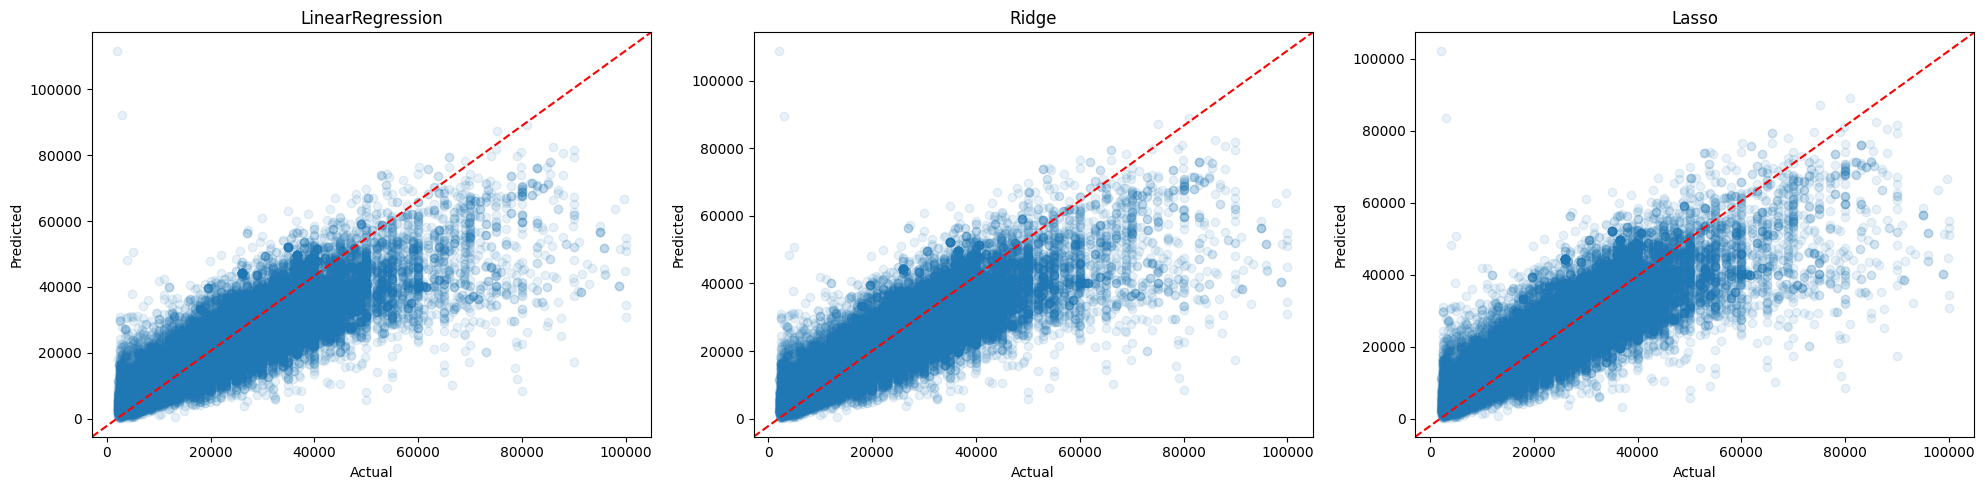

In [214]:
# Chart the results for each model and hyperparameter combination draw prediction against Actual
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (model_name, (model, params)) in enumerate(regressors.items()):
    ax = axes[i]
    ax.set_title(model_name)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.scatter(y_test, model_metrics.loc[i, 'model'].predict(X_test), alpha=0.1)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='red', ls='--')
plt.tight_layout()
plt.show()

### Best Model Evaluation and Insights

Linear, Ridge, and Lasso regression models exhibit comparable performance levels. 

However, the Lasso model takes noticeably more time to train. 

The Random Forest regressor, on the other hand, distinctly surpasses the other models in performance, boasting the smallest RMSE and MAE, and the highest R2 score. It's important to bear in mind, though, that this model requires a longer training time and tends to overfit the data.

Taking into account these factors, we have chosen the Random Forest regressor as our final model due to its unrivaled performance, despite the aforementioned challenges.

### Feature Importance

In [ ]:
# Identify most important features using feature permutation
best_model = model_metrics.loc[3, 'model']
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

In [ ]:
importance = result.importances_mean

feature_names = X.columns
importance_dict = dict(zip(feature_names, importance))

importance_sorted = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
df_importance = pd.DataFrame(importance_sorted, columns=['feature', 'importance'])

# Create a bar chart df_importance
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=df_importance, ax=ax)
ax.set_title('Feature importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
plt.show()

### Conclussions

The most important features in predicting the price of a used car that were found on this analysis are: 

1. Age of the car 
2. Odometer reading 

The age and odometer are negatively correlated with the price.

On the other hand, the following features least important for predicting the price of a used car are: 

1. Transmission
2. Size
3. Transmission 
4. Paint_color


The goal of this project was to develop a predictive model that accurately estimates used car prices based on various features. 

Run different training regression models using the preprocessed dataset, tunning their hyperparameters for optimal performance, and evaluating them. 

The Random Forest regressor was chosen as the final model due to its superior performance.

The most challenging part of this project was the data preprocessing step. 

The dataset contained a lot of missing values and outliers, needed to make rational decisions on how to handle these issues, also decided based on inference which features to keep and which to drop, making sure the final dataset was the cleanest possible and be ready for modeling. 

Improvements in the data preparation stage could potentially enhance our model's performance. 

For instance, extracting more granular details from the Vehicle Identification Number (VIN), like specific car model attributes, could help in more precise assignment of factors such as the number of cylinders, vehicle size, fuel type, and transmission type. It could also be beneficial to acquire data on the car's original price, which could be instrumental in computing the rate of depreciation.

Boosting the data volume for the model could prolong the training time but it might also augment the model's performance. 

Potentially reintroduce previously excluded features such as the car model and region, use the full dataset of 3 million records, or even add data from other resources like Kelly Blue Book.

Moreover, gathering dealership-related data, including metrics like sales speed, number of vehicles sold, existing inventory size, and so on, could prove valuable insights. 

This supplementary information could assist in providing advice to dealerships on how to better manage their inventory.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

The final reports can be found here: 

Final Report [Final Report](./README.md)
